# This sorts the bike data into zip codes of origin and destination

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
#reads in zipcode boundary geojson file
zipcodes = gpd.read_file('data/Chicago/Boundaries - ZIP Codes.geojson') 
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


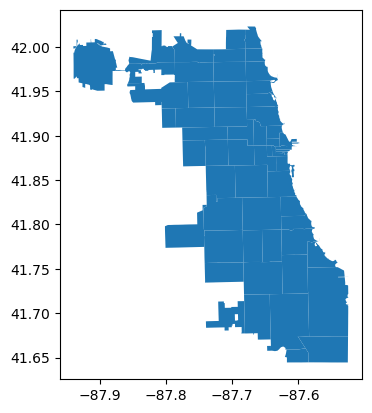

In [3]:
zipcodes.plot();

In [4]:
#drops unneeded zipcode columns
zipcodes = zipcodes[['zip', 'geometry']]

In [5]:
#reads in bike data
bikes_from = pd.read_csv('data/Chicago/cleaned/test1000000.csv')
print(bikes_from.shape)
bikes_from.head(3)

(1000000, 7)


,TRIP ID,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,23480206,41.861267,-87.656625,POINT (-87.656625 41.861267),41.877708,-87.635321,POINT (-87.6353211408 41.8777079559)
1,23480207,41.897764,-87.642884,POINT (-87.642884 41.897764),41.878166,-87.631929,POINT (-87.631929 41.878166)
2,23480208,41.879255,-87.639904,POINT (-87.639904 41.879255),41.900680,-87.662600,POINT (-87.6626 41.90068)


In [6]:
#renames columns
bikes_from = bikes_from.rename(columns={"FROM LATITUDE": "lat", "FROM LONGITUDE": "lng"})
bikes_from

,TRIP ID,lat,lng,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,23480206,41.861267,-87.656625,POINT (-87.656625 41.861267),41.877708,-87.635321,POINT (-87.6353211408 41.8777079559)
1,23480207,41.897764,-87.642884,POINT (-87.642884 41.897764),41.878166,-87.631929,POINT (-87.631929 41.878166)
2,23480208,41.879255,-87.639904,POINT (-87.639904 41.879255),41.900680,-87.662600,POINT (-87.6626 41.90068)
3,23480209,41.881690,-87.639530,POINT (-87.63953 41.88169),41.898969,-87.629912,POINT (-87.629912 41.898969)
4,23480210,41.940600,-87.678500,POINT (-87.6785 41.9406),41.940180,-87.653040,POINT (-87.65304 41.94018)
...,...,...,...,...,...,...,...
999995,19048838,41.872773,-87.623981,POINT (-87.623981 41.872773),41.872773,-87.623981,POINT (-87.623981 41.872773)
999996,19066140,41.876393,-87.620328,POINT (-87.620328 41.876393),41.880958,-87.616743,POINT (-87.616743 41.880958)
999997,19047626,41.908537,-87.648627,POINT (-87.648627 41.908537),41.925905,-87.649260,POINT (-87.64926 41.925905)
999998,19056425,41.884728,-87.619521,POINT (-87.619521 41.884728),41.890359,-87.617532,POINT (-87.617532 41.890359)


In [7]:
#created column containing geopoints
bikes_from['from_geo'] = bikes_from.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
bikes_from.head(3)

,TRIP ID,lat,lng,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,from_geo
0,23480206,41.861267,-87.656625,POINT (-87.656625 41.861267),41.877708,-87.635321,POINT (-87.6353211408 41.8777079559),POINT (-87.65662500000001 41.861267)
1,23480207,41.897764,-87.642884,POINT (-87.642884 41.897764),41.878166,-87.631929,POINT (-87.631929 41.878166),POINT (-87.642884 41.897764)
2,23480208,41.879255,-87.639904,POINT (-87.639904 41.879255),41.900680,-87.662600,POINT (-87.6626 41.90068),POINT (-87.639904 41.879255)


In [8]:
#drops unneeded columns
bikes_from_geo = bikes_from[['TRIP ID', 'from_geo']]
bikes_from_geo

,TRIP ID,from_geo
0,23480206,POINT (-87.65662500000001 41.861267)
1,23480207,POINT (-87.642884 41.897764)
2,23480208,POINT (-87.639904 41.879255)
3,23480209,POINT (-87.63952999999999 41.88169)
4,23480210,POINT (-87.6785 41.9406)
...,...,...
999995,19048838,POINT (-87.623981 41.872773)
999996,19066140,POINT (-87.620328 41.876393)
999997,19047626,POINT (-87.648627 41.908537)
999998,19056425,POINT (-87.61952100000001 41.884728)


In [9]:
#creates geodataframe from bike info
bikes_from_geo = gpd.GeoDataFrame(bikes_from_geo, 
                           crs = zipcodes.crs, 
                           geometry = bikes_from['from_geo'])

In [10]:
#sorts origin bike info into zipcodes
from_by_zip = gpd.sjoin(bikes_from_geo, zipcodes, op = 'within')
from_by_zip = from_by_zip.rename(columns={"TRIP ID": "trip_id", 'geometry': 'zip_geo', "zip": "from_zip"})
from_by_zip.head()

,trip_id,from_geo,zip_geo,index_right,from_zip
0,23480206,POINT (-87.65662500000001 41.861267),POINT (-87.65663 41.86127),42,60608
197,23480473,POINT (-87.661535 41.857556),POINT (-87.66154 41.85756),42,60608
331,23480660,POINT (-87.65662500000001 41.861267),POINT (-87.65663 41.86127),42,60608
553,23480973,POINT (-87.675726 41.855048),POINT (-87.67573 41.85505),42,60608
609,23481045,POINT (-87.65114 41.8378),POINT (-87.65114 41.83780),42,60608


In [11]:
from_by_zip.from_zip.value_counts()

60614    109094
60611     93952
60661     76817
60605     63490
60607     56441
60654     52720
60610     51277
60601     48373
60657     48276
60622     40007
60606     35405
60613     32326
60616     31168
60603     28550
60642     27447
60602     27272
60647     24501
60604     23781
60640     23354
60612     17026
60608     14795
60637     13301
60618     10367
60625      9167
60615      8339
60660      8049
60626      5874
60609      2758
60653      1989
60645      1415
60649      1036
60641       972
60651       755
60659       599
60624       542
60623       509
60619       503
60644       297
60621       288
60630       215
60639       181
60617       138
60636        86
Name: from_zip, dtype: int64

### The following repeats the same process for destination data

In [12]:
bikes_to = pd.read_csv('data/Chicago/cleaned/test1000000.csv')
print(bikes_to.shape)
bikes_to.head(3)

(1000000, 7)


,TRIP ID,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,23480206,41.861267,-87.656625,POINT (-87.656625 41.861267),41.877708,-87.635321,POINT (-87.6353211408 41.8777079559)
1,23480207,41.897764,-87.642884,POINT (-87.642884 41.897764),41.878166,-87.631929,POINT (-87.631929 41.878166)
2,23480208,41.879255,-87.639904,POINT (-87.639904 41.879255),41.900680,-87.662600,POINT (-87.6626 41.90068)


In [13]:
bikes_to = bikes_to.rename(columns={"TO LATITUDE": "lat", "TO LONGITUDE": "lng"})

In [14]:
bikes_to['to_geo'] = bikes_to.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

In [15]:
bikes_to_geo = bikes_to[['TRIP ID', 'to_geo']]

In [16]:
bikes_to_geo = gpd.GeoDataFrame(bikes_to_geo, 
                           crs = zipcodes.crs, 
                           geometry = bikes_to['to_geo'])

In [17]:
to_by_zip = gpd.sjoin(bikes_to_geo, zipcodes, op = 'within')
to_by_zip = to_by_zip.rename(columns={"TRIP ID": "trip_id", 'geometry': 'zip_geo', "zip": "to_zip"})
to_by_zip.head()

,trip_id,to_geo,zip_geo,index_right,to_zip
0,23480206,POINT (-87.63532114100001 41.877707956),POINT (-87.63532 41.87771),45,60606
10,23480217,POINT (-87.634793 41.878724),POINT (-87.63479 41.87872),45,60606
12,23480221,POINT (-87.63549999999999 41.885837),POINT (-87.63550 41.88584),45,60606
46,23480267,POINT (-87.63518500000001 41.880317),POINT (-87.63519 41.88032),45,60606
56,23480281,POINT (-87.63518500000001 41.880317),POINT (-87.63519 41.88032),45,60606


### Next, the origin and destination datasets will be merged and filtered for trips between different zip codes

In [18]:
trips_by_zip = from_by_zip.merge(to_by_zip, left_on='trip_id', right_on='trip_id')

In [19]:
trips_by_zip = trips_by_zip[['trip_id', 'from_zip', 'to_zip']]
trips_by_zip

,trip_id,from_zip,to_zip
0,23480206,60608,60606
1,23480473,60608,60601
2,23480660,60608,60606
3,23480973,60608,60607
4,23481045,60608,60661
...,...,...,...
991732,18805945,60636,60636
991733,18915611,60636,60636
991734,18915689,60636,60621
991735,18921969,60636,60636


In [20]:
#displays how many trips stay in the same zipcode
trips_by_zip.loc[trips_by_zip.from_zip == trips_by_zip.to_zip] 

,trip_id,from_zip,to_zip
8,23481175,60608,60608
18,23481622,60608,60608
25,23482011,60608,60608
44,23483069,60608,60608
59,23484187,60608,60608
...,...,...,...
991731,18808497,60636,60636
991732,18805945,60636,60636
991733,18915611,60636,60636
991735,18921969,60636,60636


In [21]:
#save the trips that arebetween zip codes
diff = trips_by_zip.loc[trips_by_zip.from_zip != trips_by_zip.to_zip] 

In [22]:
#counts the number of trips between each pair of zip codes
diff[['from_zip', 'to_zip']].value_counts().reset_index(name='count')

,from_zip,to_zip,count
0,60611,60614,13197
1,60614,60657,13176
2,60614,60611,11990
3,60657,60614,11854
4,60661,60607,10208
...,...,...,...
1222,60622,60653,1
1223,60649,60601,1
1224,60649,60607,1
1225,60649,60609,1
